Exercice 3 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn import preprocessing

Question 1 (voir pdf écrit pour la description de l'algorithme)

In [2]:
def gradient_sto_descent(w0, Z, eps, N_max):
  ####
  # w0 : initialization of the paramter w
  # Z : list of observation (x,y)
  # N_max : number of iteration max
  w = w0
  for k in range(N_max):
    i = np.random.randint(0,len(Z))
    delta_r = -2 *(Z[i][1] - w.dot(Z[i][0]))*Z[i][0]
    w -= eps[k]*delta_r
    w /= np.linalg.norm(w)

  return w


Question 2

La fonction *generate_obs(n)* gènère un vecteur *w* d'un hyperplan de la sphère unité puis n points *x_i* dans $[-1,1]^2$. A chaque *x_i*, on leur affecte un label *y_i* tel que *y_i=1* si $ \langle  x_i\; , w \; \rangle $ >= 0 et *y_i=-1* sinon

In [3]:
def generate_obs(n):

  #genrate random normal vector w
  theta = np.random.uniform(0,2*np.math.pi)
  w = np.array([np.math.cos(theta),np.math.sin(theta)])

  # generate n observations (x,y)
  Z = []
  for i in range(n):
    x = np.array([2*np.random.uniform()-1,2*np.random.uniform()-1 ])
    y = np.sign(w.dot(x))
    Z.append([x,y])

  return w, Z


Text(0.5, 1.0, "Affichage des observations avec leur label et de l'hyperplan de normal w")

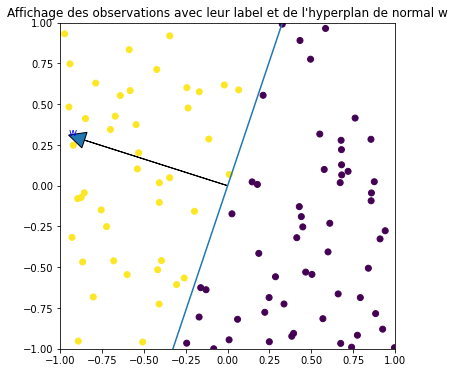

In [4]:
# plot example 

w, Z = generate_obs(100)

x =  np.concatenate((np.array([Z[0][0]]), np.array([Z[1][0]])), axis=0)
y = [Z[0][1], Z[1][1]]

for i in range(2,len(Z)):
  x =  np.concatenate((x, np.array([Z[i][0]])), axis=0)
  y.append(Z[i][1])

plt.figure(figsize=(6, 6))
plt.scatter(x[:,0], x[:,1],  c=y)
plt.arrow(0,0,w[0],w[1],length_includes_head=True,head_length=0.1,head_width=0.1)
plt.plot(np.linspace(-1,1,100),[-w[0]/w[1]*i for i in np.linspace(-1,1, 100)])
plt.annotate('w', xy = (w[0],w[1]), color = 'b')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.title("Affichage des observations avec leur label et de l'hyperplan de normal w")

Question 3

In [5]:
n = 500 # number of observations
N_max = 10000 # number max of iterations
eps = [1/k for k in range(1,N_max+1)] #suite de pas vérifiant les conditions

theta_0 = np.random.uniform(0,2*np.math.pi)
w0 = np.array([np.math.cos(theta_0),np.math.sin(theta_0)])

w, Z = generate_obs(n)

w_est = gradient_sto_descent(w0, Z, eps, N_max)


In [6]:
print("Vecteur normal estimé par la descente de gradient stochastique :", w_est)
print("Vecteur normal :", w)

Vecteur normal estimé par la descente de gradient stochastique : [0.63582217 0.77183558]
Vecteur normal : [0.67328947 0.73937899]


[]

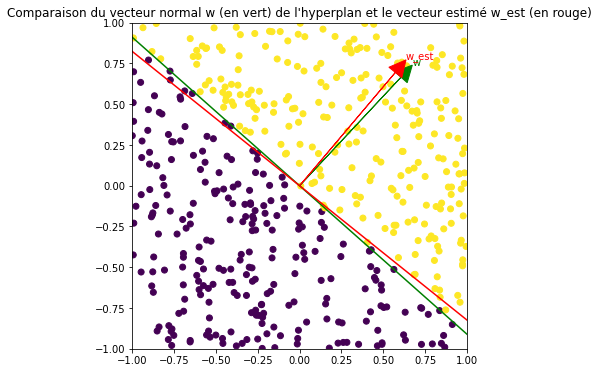

In [7]:
x =  np.concatenate((np.array([Z[0][0]]), np.array([Z[1][0]])), axis=0)
y = [Z[0][1], Z[1][1]]

for i in range(2,len(Z)):
  x =  np.concatenate((x, np.array([Z[i][0]])), axis=0)
  y.append(Z[i][1])

plt.figure(figsize=(6, 6))
plt.scatter(x[:,0], x[:,1],  c=y)

plt.arrow(0,0,w[0],w[1],length_includes_head=True,head_length=0.1,head_width=0.1, color = 'g')
plt.annotate('w', xy = (w[0],w[1]), color = 'g')

plt.arrow(0,0,w_est[0],w_est[1],length_includes_head=True,head_length=0.1,head_width=0.1, color = 'r')
plt.annotate('w_est', xy = (w_est[0],w_est[1]), color = 'r')

plt.plot(np.linspace(-1,1,100),[-w[0]/w[1]*i for i in np.linspace(-1,1, 100)],color = 'g')
plt.plot(np.linspace(-1,1,100),[-w_est[0]/w_est[1]*i for i in np.linspace(-1,1, 100)], color = 'r')

plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.title("Comparaison du vecteur normal w (en vert) de l'hyperplan et le vecteur estimé w_est (en rouge)")
plt.plot()

In [8]:
## Calcul de l'accuracy de la prediction à partir de w_est sur plusieurs ensemble d'observations de taille n :
N_obs = 500 # nombre d'ensemble d'observations sur lesquels on effectue le test
n = 500 # number of observations
N_max = 10000 # number max of iterations 
eps = [1/k for k in range(1,N_max+1)] #suite de pas vérifiant les conditions

acc_list = []
for i in range(N_obs):
  if i%100 == 0: 
    print('it n°',i)
  theta_0 = np.random.uniform(0,2*np.math.pi)
  w0 = np.array([np.math.cos(theta_0),np.math.sin(theta_0)])

  w, Z = generate_obs(n)

  w_est = gradient_sto_descent(w0, Z, eps, N_max)

  s = 0
  for k_obs in range(n):
    x = Z[k_obs][0]
    y=  Z[k_obs][1]
    y_est = np.sign(w_est.dot(x))
    if y==y_est:
      s+= 1

  acc_list.append(s/n)
  
print("La précision moyenne (mean accuracy) est ",np.mean(np.array(acc_list)) )

it n° 0
it n° 100
it n° 200
it n° 300
it n° 400
La précision moyenne (mean accuracy) est  0.9763879999999999


Le choix de w0 n'influe pas sur le résultat des performances car on fait une moyenne sur 500 tests ce qui réduit l'impact du choix de w0.

Question 4

In [9]:
def generate_obs_gaussian_noise(n):

  #genrate random normal vector w
  theta = np.random.uniform(0,2*np.math.pi)
  w = np.array([np.math.cos(theta),np.math.sin(theta)])

  # generate n observations (x,y)
  Z = []
  for i in range(n):
    x = np.array([2*np.random.uniform()-1,2*np.random.uniform()-1 ])
    y = np.sign(w.dot(x))
    # add gaussian noise
    x += np.random.normal(np.array([0, 0]), 0.2)
    Z.append([x,y])

  return w, Z


In [10]:
n = 500 # number of observations
N_max = 10000 # number max of iterations
eps = [1/k for k in range(1,N_max+1)] #suite de pas vérifiant les conditions

theta_0 = np.random.uniform(0,2*np.math.pi)
w0 = np.array([np.math.cos(theta_0),np.math.sin(theta_0)])

w, Z = generate_obs_gaussian_noise(n)

w_est = gradient_sto_descent(w0, Z, eps, N_max)

print("Vecteur normal estimé par la descente de gradient stochastique :", w_est)
print("Vecteur normal :", w)

Vecteur normal estimé par la descente de gradient stochastique : [ 0.99365254 -0.11249282]
Vecteur normal : [ 0.9873575  -0.15850922]


[]

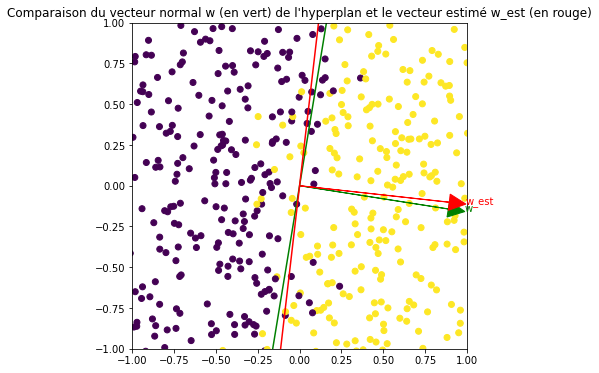

In [11]:
x =  np.concatenate((np.array([Z[0][0]]), np.array([Z[1][0]])), axis=0)
y = [Z[0][1], Z[1][1]]

for i in range(2,len(Z)):
  x =  np.concatenate((x, np.array([Z[i][0]])), axis=0)
  y.append(Z[i][1])

plt.figure(figsize=(6, 6))
plt.scatter(x[:,0], x[:,1],  c=y)

plt.arrow(0,0,w[0],w[1],length_includes_head=True,head_length=0.1,head_width=0.1, color = 'g')
plt.annotate('w', xy = (w[0],w[1]), color = 'g')

plt.arrow(0,0,w_est[0],w_est[1],length_includes_head=True,head_length=0.1,head_width=0.1, color = 'r')
plt.annotate('w_est', xy = (w_est[0],w_est[1]), color = 'r')

plt.plot(np.linspace(-1,1,100),[-w[0]/w[1]*i for i in np.linspace(-1,1, 100)],color = 'g')
plt.plot(np.linspace(-1,1,100),[-w_est[0]/w_est[1]*i for i in np.linspace(-1,1, 100)], color = 'r')

plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.title("Comparaison du vecteur normal w (en vert) de l'hyperplan et le vecteur estimé w_est (en rouge)")
plt.plot()

In [12]:
## Calcul de l'accuracy de la prediction à partir de w_est sur plusieurs ensemble d'observations de taille n :
N_obs = 500 # nombre d'ensemble d'observations sur lesquels on effectue le test
n = 500 # number of observations
N_max = 10000 # number max of iterations 
eps = [1/k for k in range(1,N_max+1)] #suite de pas vérifiant les conditions

acc_list = []
for i in range(N_obs):
  if i%100 == 0: 
    print('it n°',i)
  theta_0 = np.random.uniform(0,2*np.math.pi)
  w0 = np.array([np.math.cos(theta_0),np.math.sin(theta_0)])

  w, Z = generate_obs_gaussian_noise(n)

  w_est = gradient_sto_descent(w0, Z, eps, N_max)

  s = 0
  for k_obs in range(n):
    x = Z[k_obs][0]
    y=  Z[k_obs][1]
    y_est = np.sign(w_est.dot(x))
    if y==y_est:
      s+= 1

  acc_list.append(s/n)
  
print("La précision moyenne (mean accuracy) est ",np.mean(np.array(acc_list)) )

it n° 0
it n° 100
it n° 200
it n° 300
it n° 400
La précision moyenne (mean accuracy) est  0.9114680000000001


Question 5

In [14]:
with open('/breast-cancer-wisconsin.data', 'r') as file:
  df = csv.reader(file)
  list_x = []
  list_x_norm = []
  list_y = []
  for row_i in df:
    if '?' in row_i:
      pass
    else:
      y = int(row_i[-1])-3
      list_x.append(np.array(list(map(float, row_i[1:-1]))))
      list_x_norm.append((np.array(list(map(float, row_i[1:-1]))) - 5) / np.sqrt(9*5**2))
      list_y.append(y)



In [16]:
Z = []
Z_norm = []
  
for i in range(len(list_x)):
  Z.append([list_x[i],list_y[i]])
  Z_norm.append([list_x_norm[i],list_y[i]])


Dans list_x_norm, on normalise les vecteurs x afin que leurs valeurs soient comprises en [-1,1]. Comme les valeurs de x sont comprises entre 1 et 10, en soustrayant 5 à x, on a des valeurs entre -4 et 5. Puis en divisant par la norme maximale d'un vecteur dont les valeurs sont comprises entre -4 et 5 : max ||x|| = sqrt( 9 * 5^2), on obtient des vecteurs dont les valeurs sont comprises entre -1 et 1.

In [22]:
def get_accuracy(w_est,Z):
  s = 0
  for i_obs in range(len(Z)):
    x = Z[i_obs][0]
    y =  Z[i_obs][1]
    y_est = np.sign(w_est.dot(x))
    if y==y_est:
      s+= 1
  return s/len(Z)
    


In [29]:
#initialisation
N_max = 50000 # number max of iterations
eps = [1/k for k in range(1,N_max+1)] #suite de pas vérifiant les conditions
N_iteration_initialisation = 100



In [32]:
list_acc = []
list_acc_norm = []
for k_ini in range(N_iteration_initialisation):
  if k_ini%20==0: 
    print("it n°", k_ini)

  w0 = np.random.rand(9)
  w0_norm = np.copy(w0)

  w_est = gradient_sto_descent(w0, Z, eps, N_max)
  w_est_norm = gradient_sto_descent(w0_norm, Z_norm, eps, N_max)

  list_acc.append(get_accuracy(w_est,Z))
  list_acc_norm.append(get_accuracy(w_est_norm,Z_norm))

print("La précision (accuracy) avec les données pas transformées est ",np.mean(np.array(list_acc)))
print("La précision (accuracy) avec les données normalisées est ",np.mean(np.array(list_acc_norm)))

it n° 0
it n° 20
it n° 40
it n° 60
it n° 80
La précision (accuracy) avec les données pas transformées est  0.8097364568081988
La précision (accuracy) avec les données normalisées est  0.9384773060029283


On effectue une boucle afin de calculer la précision moyenne de l'algorithme et enlever l'impact de l'initialisation de w0. On obtient de meilleurs résultats après avoir normalisé les données avec une précision moyenne (mean accuracy) de 0.94 contre une précision moyenne de 0.81 pour les données non normalisées. On réduit donc de 13% l'erreur en normalisant les données.